In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
from Modes import ModeContainer
import numpy as onp
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [27]:
onp.random.seed(0)

# Example 1

$$\begin{matrix}x_1=w_1\\x_2=w_2 \end{matrix} $$

In [28]:
W=onp.random.normal(size=(4,1000))
X=onp.concatenate([W[:2],W])
X=(X-onp.mean(X,axis=1)[:,None])/onp.std(X,axis=1)[:,None]
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']    

In [29]:
modes=ModeContainer.make_container(
    X,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1},
)

In [30]:
graph_discovery=GraphDiscoveryNew(X,onp.array(node_names),modes)

inspecting $x_1$
gamma too small for set gamma_min (5.22e-27) needed for numerical stability, using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set gamma_min (3.27e-27) needed for numerical stability, using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=4.36e-03)
 n/(n+s)=0.01, Z=0.84
$x_1$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2

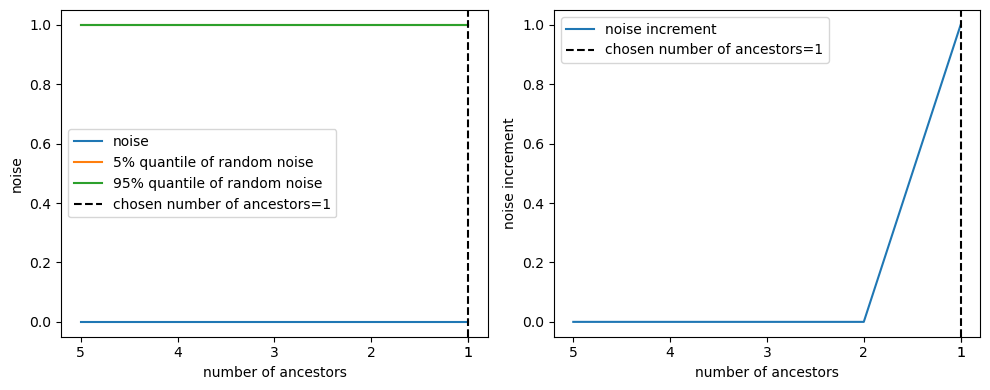

ancestors after pruning:  ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$'] 



inspecting $x_2$
gamma too small for set gamma_min (4.32e-27) needed for numerical stability, using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set gamma_min (2.87e-27) needed for numerical stability, using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=4.30e-03)
 n/(n+s)=0.01, Z=0.84
$x_2$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$', 

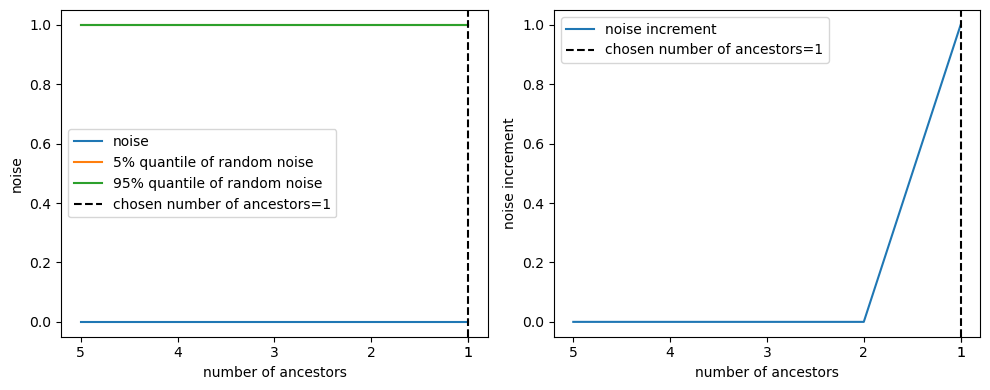

ancestors after pruning:  ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$'] 



inspecting $w_1$
gamma too small for set gamma_min (5.22e-27) needed for numerical stability, using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set gamma_min (3.98e-27) needed for numerical stability, using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=4.36e-03)
 n/(n+s)=0.01, Z=0.84
$w_1$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$', 

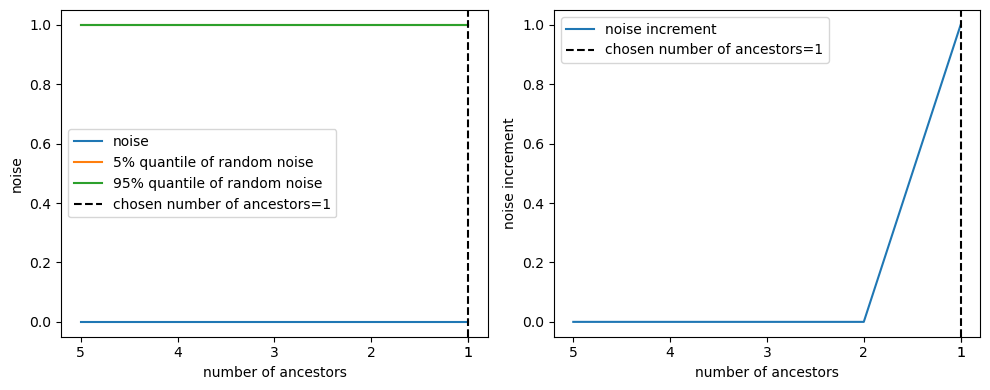

ancestors after pruning:  ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$'] 



inspecting $w_2$
gamma too small for set gamma_min (3.66e-27) needed for numerical stability, using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set gamma_min (2.88e-27) needed for numerical stability, using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=4.30e-03)
 n/(n+s)=0.01, Z=0.84
$w_2$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$', 

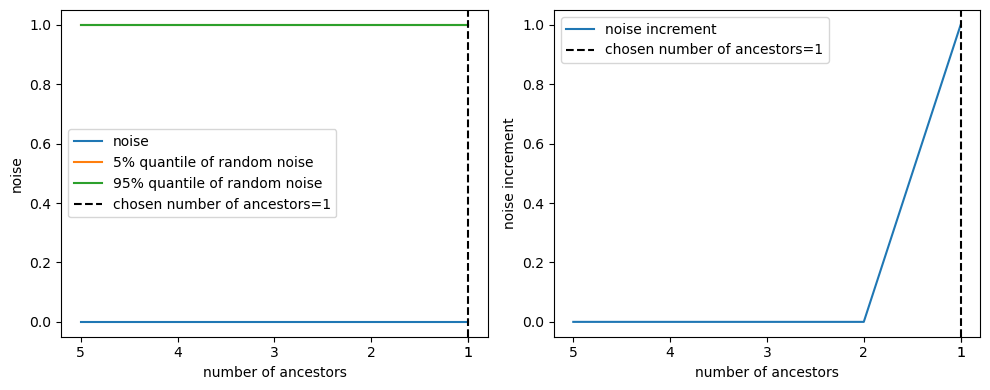

ancestors after pruning:  ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$'] 



inspecting $w_3$
linear kernel (using gamma=9.98e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=9.88e+02)
 n/(n+s)=1.00, Z=1.00
gaussian kernel (using gamma=8.50e-06)
 n/(n+s)=0.94, Z=0.92
$w_3$ has no ancestors



inspecting $w_4$
linear kernel (using gamma=9.99e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=9.95e+02)
 n/(n+s)=1.00, Z=1.00
gaussian kernel (using gamma=8.22e-06)
 n/(n+s)=0.92, Z=0.91
$w_4$ has no ancestors





In [31]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(
        node,
        gamma='auto'
    )
    print('\n')

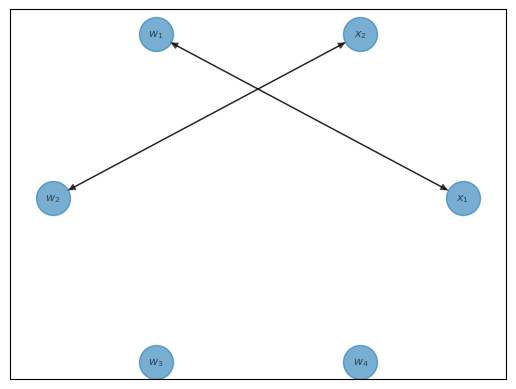

In [ ]:
graph_discovery.plot_graph(type_label=False)

# Example 2

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^2+1+0.1w_2\\x_3&=&w_3 \end{matrix} $$

In [48]:
W=onp.random.normal(size=(4,1000))
X1=W[0]
X2=X1**2+1+0.1*W[1]
X3=W[2]
X=onp.concatenate([onp.stack([X1,X2,X3],axis=0),W])
X=(X-onp.mean(X,axis=1)[:,None])/onp.std(X,axis=1)[:,None]
node_names=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']   

In [49]:
modes=ModeContainer.make_container(
    X,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1},
)

In [50]:
graph_discovery=GraphDiscoveryNew(X,onp.array(node_names),modes)

inspecting $x_1$
gamma too small for set tolerance(3.09e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(5.74e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=2.49e-02)
 n/(n+s)=0.01, Z=0.82
$x_1$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$x_3$', '$w_1$', '$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_3$', '$w_1$', '$w_2$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_3$', '$w_1$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$w_1$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$w_1$']

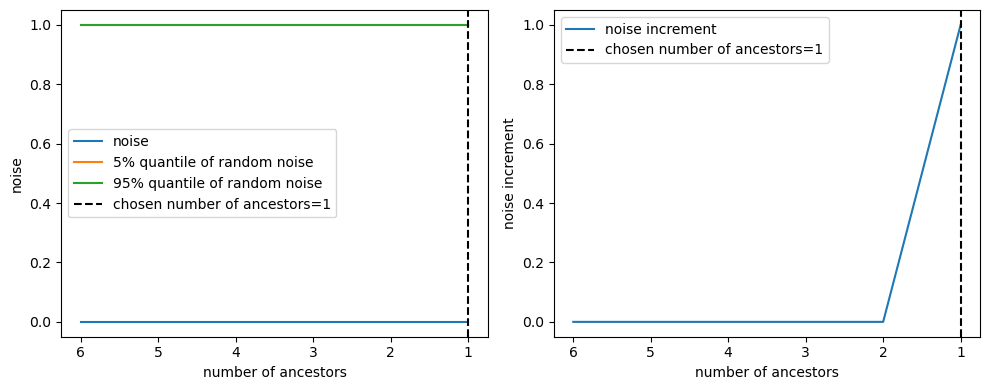

ancestors after pruning:  ['$w_1$'] 



inspecting $x_2$
linear kernel (using gamma=9.87e+02)
 n/(n+s)=1.00, Z=1.00
gamma too small for set tolerance(4.13e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=1.89e-02)
 n/(n+s)=0.00, Z=0.83
$x_2$ has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_3$', '$w_1$', '$w_2$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_3$', '$w_1$', '$w_2$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$w_1$', '$w_2$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$w_1$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$w_1$']
 n/(n+s)=1.00, Z=1.00


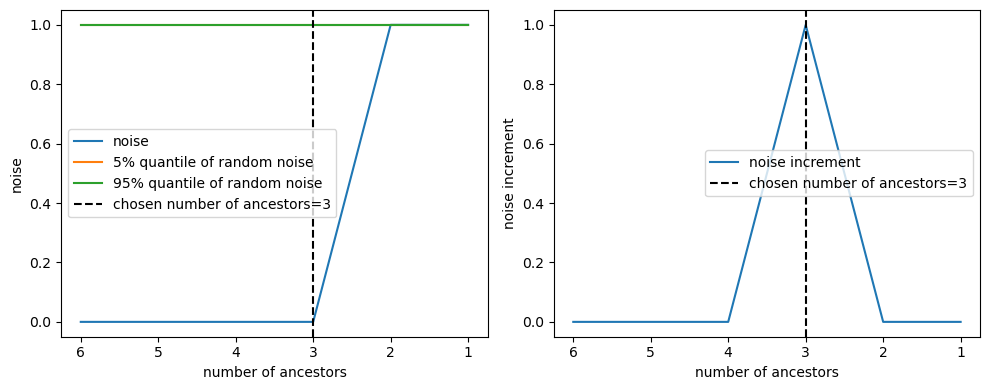

ancestors after pruning:  ['$x_1$', '$w_1$', '$w_2$'] 



inspecting $x_3$
gamma too small for set tolerance(5.59e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(4.54e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=1.87e-02)
 n/(n+s)=0.01, Z=0.83
$x_3$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$w_1$', '$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$w

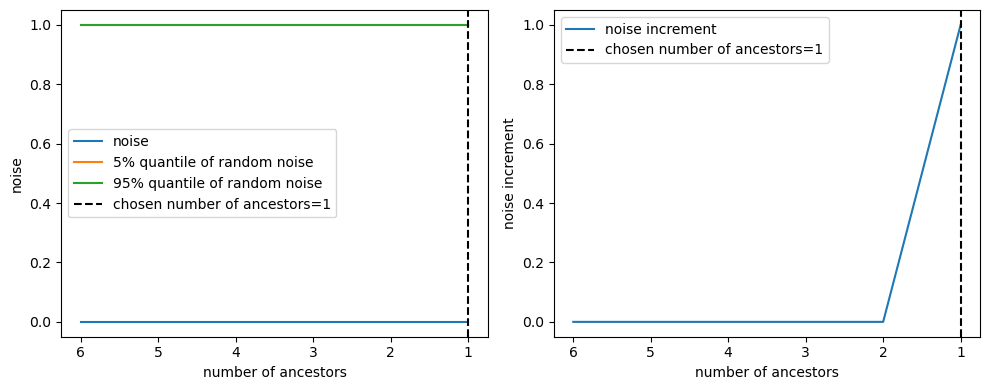

ancestors after pruning:  ['$w_3$'] 



inspecting $w_1$
gamma too small for set tolerance(4.26e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(4.67e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=2.49e-02)
 n/(n+s)=0.01, Z=0.82
$w_1$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_3$', '$w_2$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_3$', '$w_2$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_3$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$w_3$']
 n/

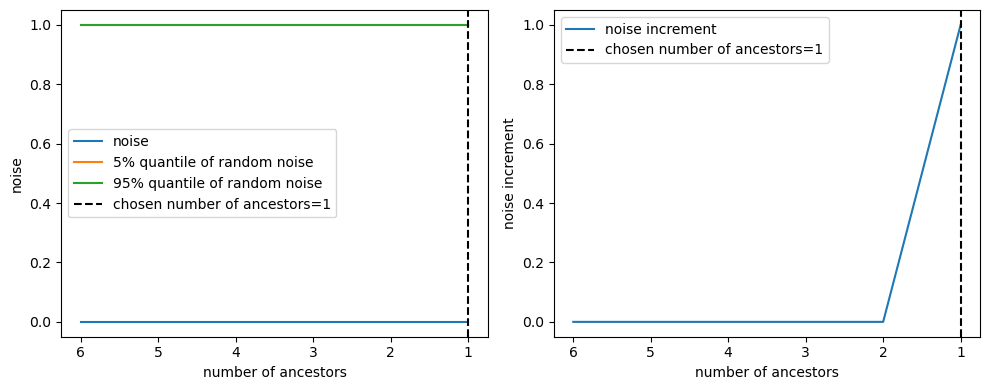

ancestors after pruning:  ['$x_1$'] 



inspecting $w_2$
linear kernel (using gamma=9.96e+02)
 n/(n+s)=1.00, Z=1.00
gamma too small for set tolerance(5.33e-23), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=7.91e-04)
 n/(n+s)=0.03, Z=0.88
$w_2$ has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_3$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_1$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_2$', '$w_1$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_2$']
 n/(n+s)=1.00, Z=1.00


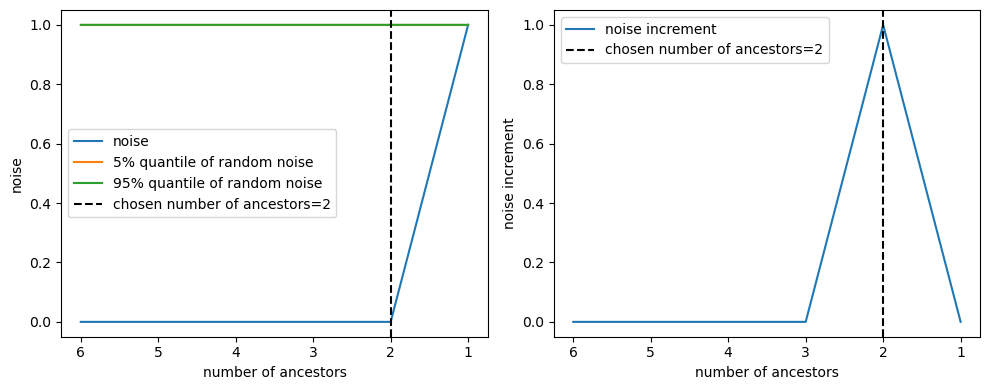

ancestors after pruning:  ['$x_2$', '$w_1$'] 



inspecting $w_3$
gamma too small for set tolerance(4.35e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(5.48e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=1.87e-02)
 n/(n+s)=0.01, Z=0.83
$w_3$ has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_3$', '$w_1$', '$w_2$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_3$', '$w_1$', '$w_2$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_3$', '$w_2$', '$w_4$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_3$', '$w

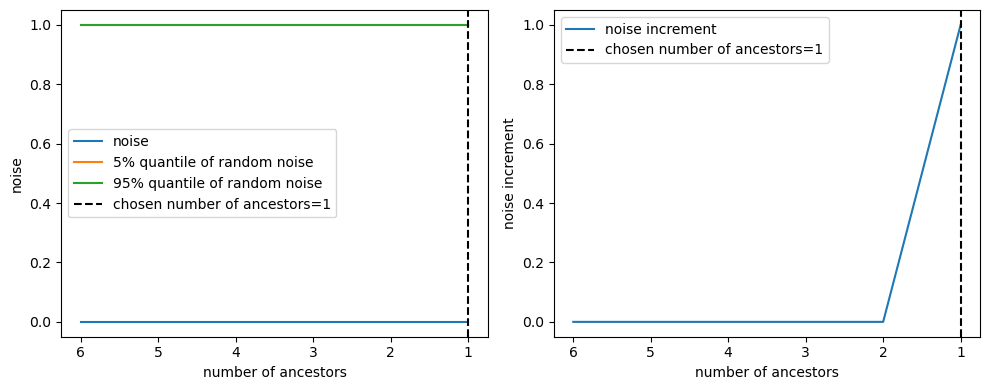

ancestors after pruning:  ['$x_3$'] 



inspecting $w_4$
linear kernel (using gamma=9.98e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=9.96e+02)
 n/(n+s)=1.00, Z=1.00
gaussian kernel (using gamma=1.10e-04)
 n/(n+s)=0.92, Z=0.91
$w_4$ has no ancestors





In [51]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(
        node,
        gamma='auto'
    )
    print('\n')

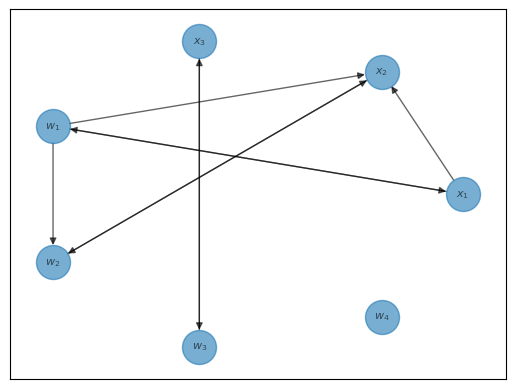

In [52]:
graph_discovery.plot_graph(type_label=False)

# Example 3

$$\begin{matrix}x_1&=&w_1w_2\\x_2&=&w_2\sin(w_4)\end{matrix} $$

In [53]:
W=onp.random.normal(size=(4,1000))
X1=W[0]*W[1]
X2=W[1]*onp.sin(W[3])
X=onp.concatenate([onp.stack([X1,X2],axis=0),W])
X=(X-onp.mean(X,axis=1)[:,None])/onp.std(X,axis=1)[:,None]
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']   

In [54]:
modes=ModeContainer.make_container(
    X,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1},
)

In [55]:
graph_discovery=GraphDiscoveryNew(X,onp.array(node_names),modes)

inspecting $x_1$
linear kernel (using gamma=9.95e+02)
 n/(n+s)=1.00, Z=1.00
gamma too small for set tolerance(3.17e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=9.45e-03)
 n/(n+s)=0.00, Z=0.82
$x_1$ has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['$x_2$', '$w_1$', '$w_2$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$w_1$', '$w_2$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$w_1$', '$w_2$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$w_1$']
 n/(n+s)=1.00, Z=1.00


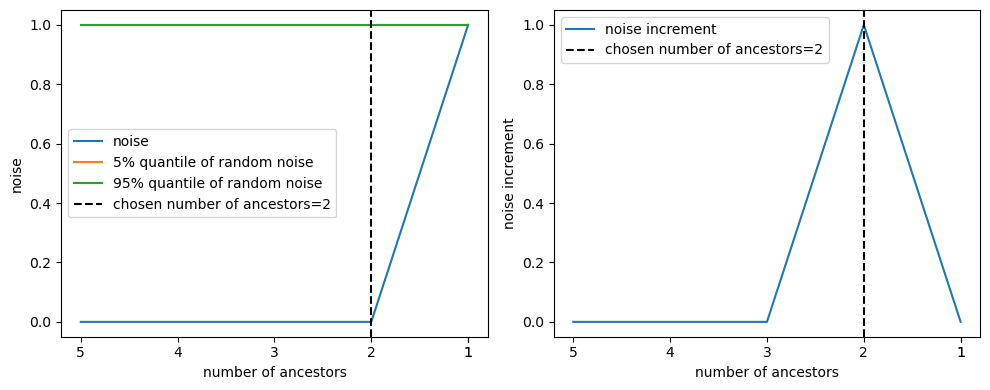

ancestors after pruning:  ['$w_1$', '$w_2$'] 



inspecting $x_2$
linear kernel (using gamma=9.92e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=1.60e+02)
 n/(n+s)=0.71, Z=0.99
gaussian kernel (using gamma=7.21e-03)
 n/(n+s)=0.04, Z=0.84
$x_2$ has ancestors with gaussian kernel (n/(s+n)=0.04)
ancestors : ['$x_1$', '$w_1$', '$w_2$', '$w_4$']
 n/(n+s)=0.03, Z=0.92
ancestors : ['$w_1$', '$w_2$', '$w_4$']
 n/(n+s)=0.03, Z=0.93
ancestors : ['$w_2$', '$w_4$']
 n/(n+s)=0.04, Z=0.99


d:\OneDrive - California Institute of Technology\Caltech\Research\Computational hypergraph discovery\GraphDiscovery\newGraphDiscovery.py:188: RuntimeWarning: divide by zero encountered in divide
  return -onp.var(1 / (1 + eigenvalues * onp.exp(-gamma_log)))
c:\Users\theob\AppData\Local\anaconda3\envs\torch\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ancestors : ['$w_2$']
 n/(n+s)=1.00, Z=1.00


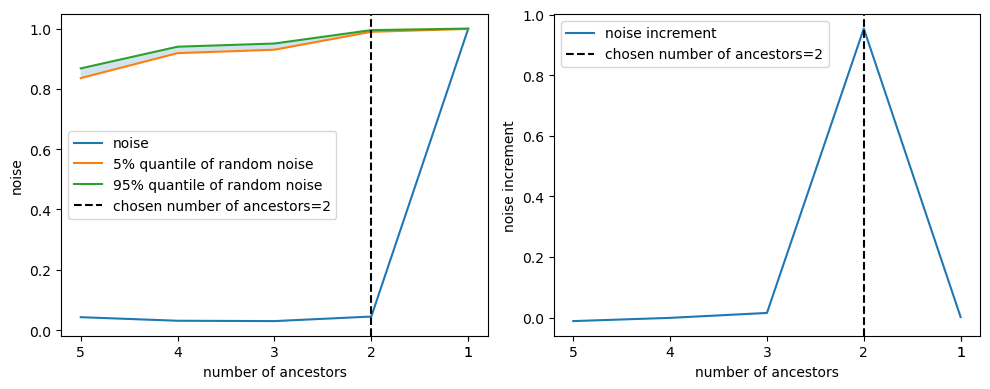

ancestors after pruning:  ['$w_2$', '$w_4$'] 



inspecting $w_1$
linear kernel (using gamma=9.94e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=6.38e+02)
 n/(n+s)=0.92, Z=1.00
gaussian kernel (using gamma=4.14e-03)
 n/(n+s)=0.86, Z=0.85
$w_1$ has ancestors with quadratic kernel (n/(s+n)=0.92)
ancestors : ['$x_1$', '$x_2$', '$w_2$', '$w_3$']
 n/(n+s)=0.92, Z=1.00
ancestors : ['$x_1$', '$w_2$', '$w_3$']
 n/(n+s)=0.92, Z=1.00
ancestors : ['$x_1$', '$w_2$']
 n/(n+s)=0.92, Z=1.00
ancestors : ['$w_2$']
 n/(n+s)=1.00, Z=1.00


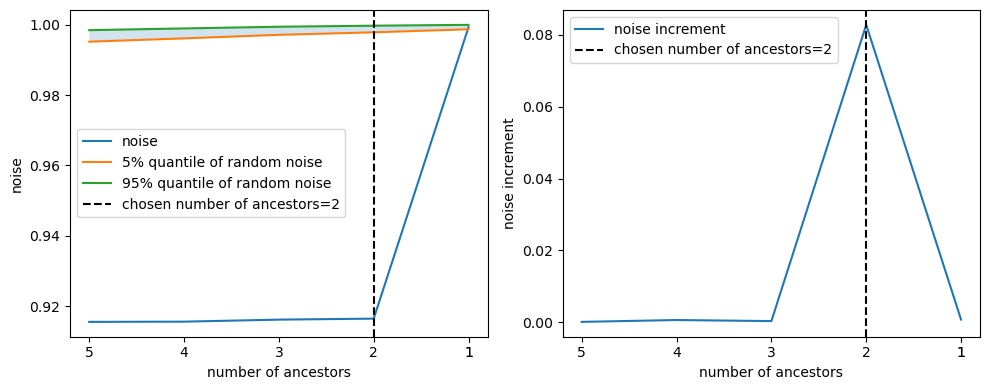

ancestors after pruning:  ['$x_1$', '$w_2$'] 



inspecting $w_2$
linear kernel (using gamma=9.89e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=3.48e+02)
 n/(n+s)=0.79, Z=0.99
gaussian kernel (using gamma=8.74e-03)
 n/(n+s)=0.80, Z=0.83
$w_2$ has ancestors with quadratic kernel (n/(s+n)=0.79)
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_4$']
 n/(n+s)=0.79, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_4$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$x_2$', '$w_4$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$x_2$']
 n/(n+s)=1.00, Z=1.00


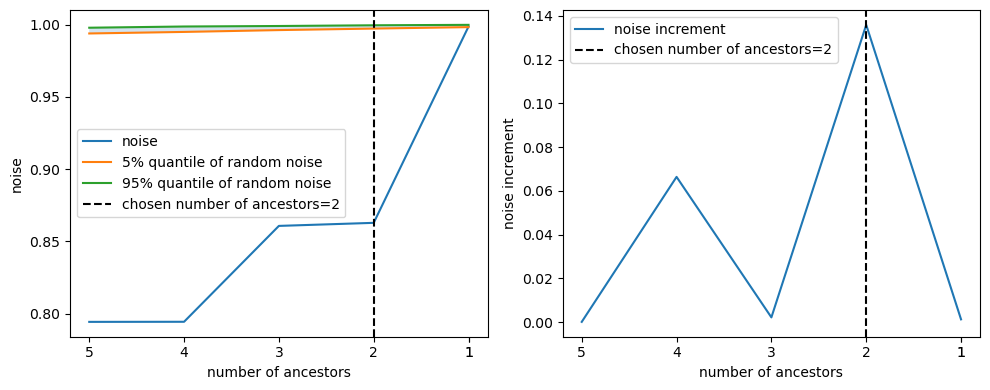

ancestors after pruning:  ['$x_2$', '$w_4$'] 



inspecting $w_3$
linear kernel (using gamma=9.98e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=9.85e+02)
 n/(n+s)=1.00, Z=1.00
gaussian kernel (using gamma=1.58e-04)
 n/(n+s)=0.92, Z=0.90
$w_3$ has no ancestors



inspecting $w_4$
linear kernel (using gamma=9.96e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=7.06e+02)
 n/(n+s)=0.94, Z=1.00
gaussian kernel (using gamma=3.03e-03)
 n/(n+s)=0.90, Z=0.86
$w_4$ has ancestors with quadratic kernel (n/(s+n)=0.94)
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$']
 n/(n+s)=0.94, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_2$']
 n/(n+s)=0.94, Z=1.00
ancestors : ['$x_2$', '$w_2$']
 n/(n+s)=0.94, Z=1.00
ancestors : ['$x_2$']
 n/(n+s)=1.00, Z=1.00


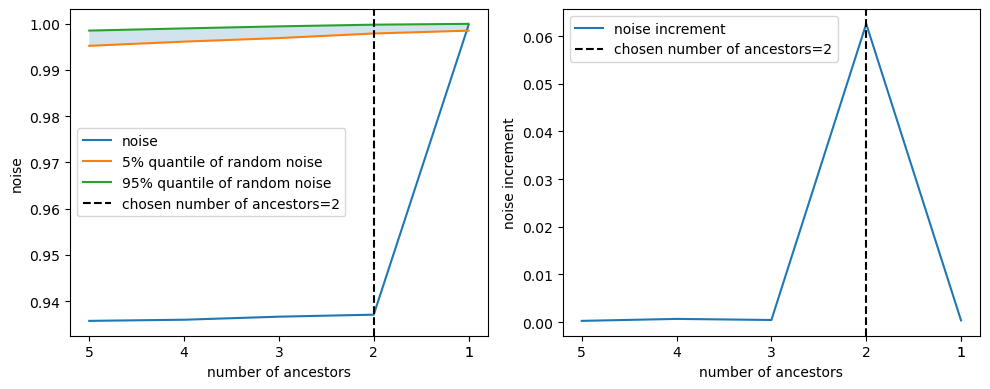

ancestors after pruning:  ['$x_2$', '$w_2$'] 





In [56]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(
        node,
        gamma='auto'
    )
    print('\n')

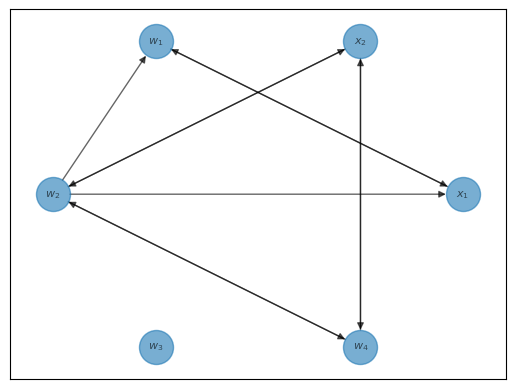

In [57]:
graph_discovery.plot_graph(type_label=False)

# Example 4

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^3+1+0.1w_2\\x_3&=&(x_1+2)^3+0.1w_3\end{matrix} $$

In [62]:
W=onp.random.normal(size=(4,1000))
X1=W[0]
X2=X1**3+1+0.1*W[1]
X3=(X1+2)**3+0.1*W[2]
X=onp.concatenate([onp.stack([X1,X2,X3],axis=0),W])
X=(X-onp.mean(X,axis=1)[:,None])/onp.std(X,axis=1)[:,None]
node_names=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']  

In [63]:
modes=ModeContainer.make_container(
    X,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1},
)

In [64]:
graph_discovery=GraphDiscoveryNew(X,onp.array(node_names),modes)

inspecting $x_1$
gamma too small for set tolerance(5.17e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(1.02e-26), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=1.18e-02)
 n/(n+s)=0.00, Z=0.84
$x_1$ has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['$x_2$', '$x_3$', '$w_1$', '$w_2$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_2$', '$x_3$', '$w_1$', '$w_2$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_2$', '$x_3$', '$w_1$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_3$', '$w_1$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$w_1

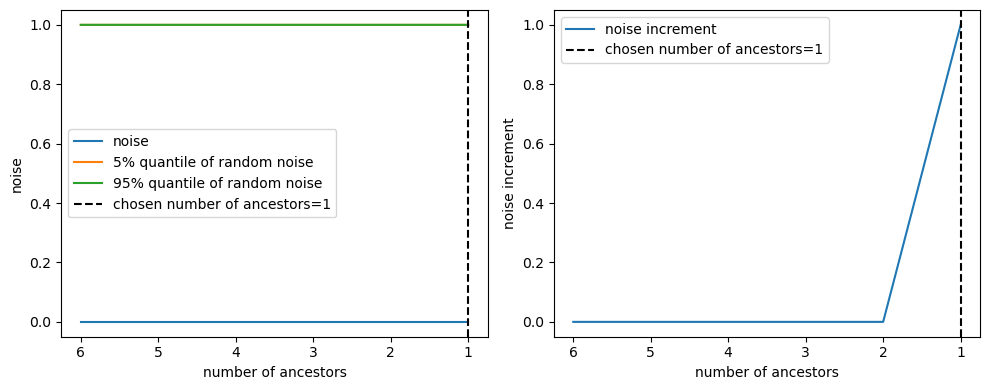

ancestors after pruning:  ['$w_1$'] 



inspecting $x_2$
linear kernel (using gamma=3.67e+02)
 n/(n+s)=0.79, Z=1.00
gamma too small for set tolerance(8.59e-20), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=1.30e-02)
 n/(n+s)=0.01, Z=0.83
$x_2$ has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_3$', '$w_1$', '$w_2$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_3$', '$w_1$', '$w_3$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$x_1$', '$x_3$', '$w_1$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$x_3$', '$w_1$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$w_1$']
 n/(n+s)=1.00, Z=1.00


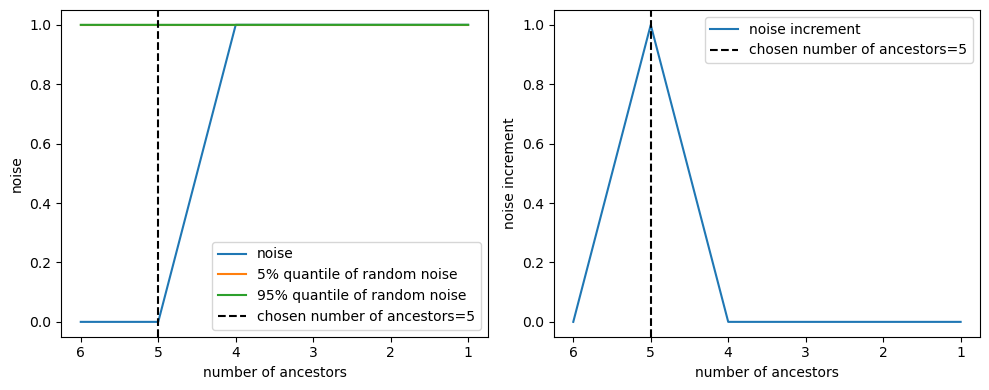

ancestors after pruning:  ['$x_1$', '$x_3$', '$w_1$', '$w_2$', '$w_3$'] 



inspecting $x_3$
linear kernel (using gamma=2.37e+02)
 n/(n+s)=0.68, Z=1.00
gamma too small for set tolerance(9.37e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=1.27e-02)
 n/(n+s)=0.00, Z=0.84
$x_3$ has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_1$', '$w_3$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_3$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$x_1$', '$x_2$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$x_1$']
 n/(n+s)=1.00, Z=1.00


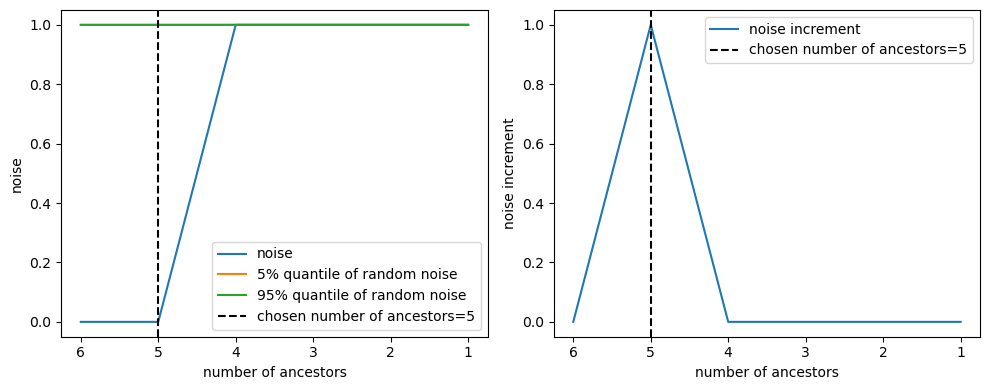

ancestors after pruning:  ['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$'] 



inspecting $w_1$
gamma too small for set tolerance(4.64e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gamma too small for set tolerance(8.01e-27), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=1.18e-02)
 n/(n+s)=0.00, Z=0.84
$w_1$ has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_2$', '$x_3$', '$w_2$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$x_3$', '$w_2$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_2$']
 n/(n+s)=0.00, Z=

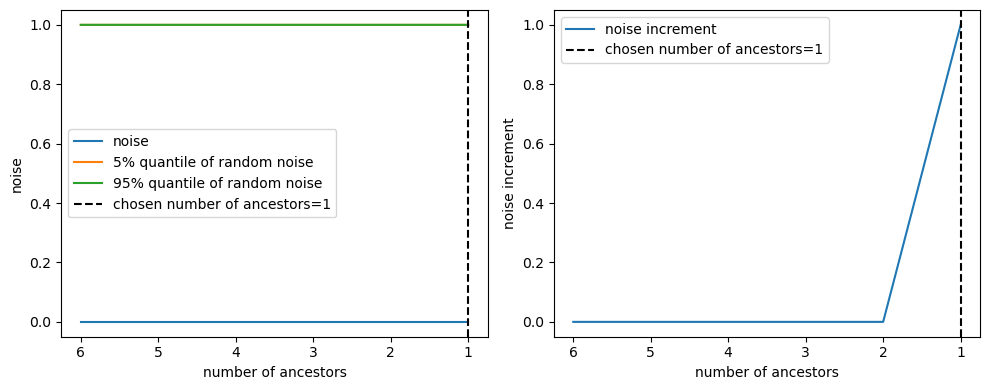

ancestors after pruning:  ['$x_1$'] 



inspecting $w_2$
linear kernel (using gamma=9.98e+02)
 n/(n+s)=1.00, Z=1.00
gamma too small for set tolerance(2.12e-15), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=1.15e-04)
 n/(n+s)=0.05, Z=0.90
$w_2$ has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_2$', '$x_3$', '$w_1$', '$w_3$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$x_3$', '$w_1$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$w_1$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$x_1$', '$w_1$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$w_1$']
 n/(n+s)=1.00, Z=1.00


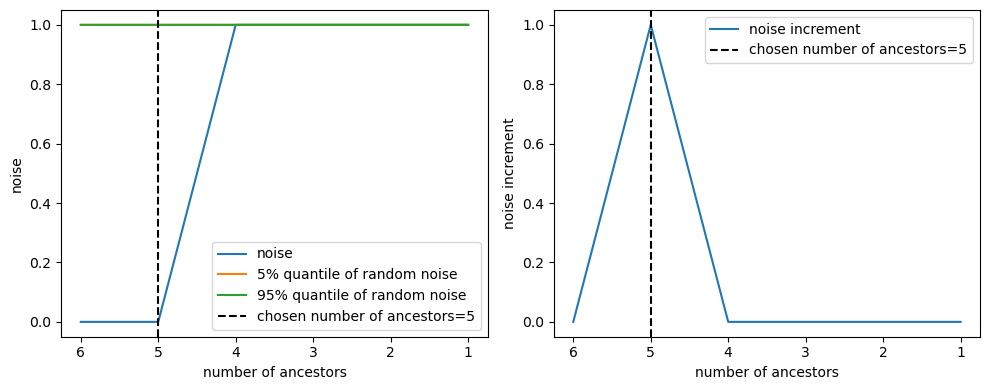

ancestors after pruning:  ['$x_1$', '$x_2$', '$x_3$', '$w_1$', '$w_3$'] 



inspecting $w_3$
linear kernel (using gamma=9.95e+02)
 n/(n+s)=1.00, Z=1.00
gamma too small for set tolerance(2.56e-18), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
quadratic kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
gaussian kernel (using gamma=5.53e-05)
 n/(n+s)=0.05, Z=0.90
$w_3$ has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['$x_1$', '$x_2$', '$x_3$', '$w_1$', '$w_2$']
 n/(n+s)=0.00, Z=1.00
ancestors : ['$x_1$', '$x_2$', '$x_3$', '$w_1$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$x_1$', '$x_3$', '$w_1$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$x_1$', '$w_1$']
 n/(n+s)=1.00, Z=1.00
ancestors : ['$w_1$']
 n/(n+s)=1.00, Z=1.00


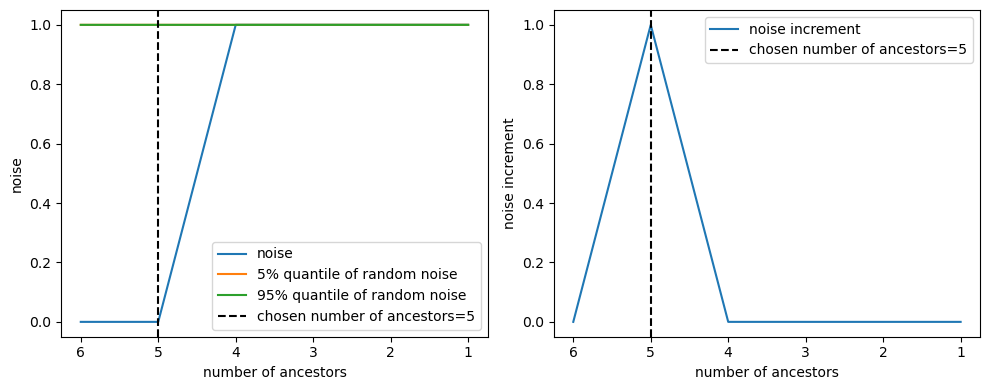

ancestors after pruning:  ['$x_1$', '$x_2$', '$x_3$', '$w_1$', '$w_2$'] 



inspecting $w_4$
linear kernel (using gamma=9.94e+02)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=9.78e+02)
 n/(n+s)=1.00, Z=1.00
gaussian kernel (using gamma=2.10e-05)
 n/(n+s)=0.94, Z=0.92
$w_4$ has no ancestors





In [65]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(
        node,
        gamma='auto'
    )
    print('\n')

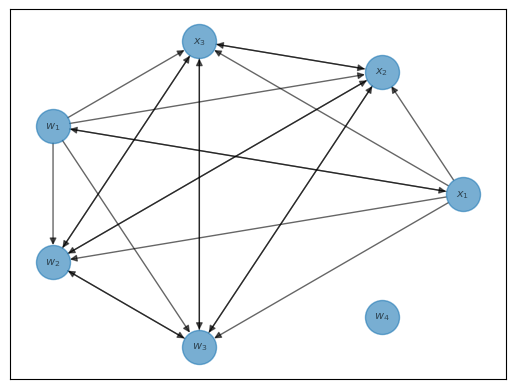

In [66]:
graph_discovery.plot_graph(type_label=False)